# ЭТАП 1: Exploratory Data Analysis (Продолжение)

**Цель**: Корреляционный анализ и визуализация взаимосвязей между признаками, итоговые выводы по EDA.

---


# Импорт библиотек


In [1]:
# Основные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print("Библиотеки импортированы успешно!")


Библиотеки импортированы успешно!


# Загрузка и проверка Датасета


In [3]:
# Загрузка датасета
df = pd.read_csv('/content/dataset.csv', index_col=0)

print(f"Загружено записей: {len(df)}")
print(f"Количество колонок: {len(df.columns)}")
print(f"Размер в памяти: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Вывод первых 5 записей
df.head(5)


Загружено записей: 114000
Количество колонок: 20
Размер в памяти: 49.66 MB


track_id                 artists  \
0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1         0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2         0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3         0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4         0.618  0.4430    2    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature track_genre  
0          0.000001    0.3580    0.715   87.917               4    acoustic  
1          0.000006    0.1010    0.267   77.489               4    acoustic  
2          0.000000    0.1170    0.120   76.332               4    acoustic  
3          0.000071    0.1320    0.143  181.740               3    acoustic  
4          0.000000    0.0829    0.167  119.949               4    acoustic

---
# ЗАДАЧА 4: Корреляционный анализ

## Цель
Построение матрицы корреляций Пирсона, выделение признаков с сильной корреляцией с таргетом, ранжирование признаков по силе связи с популярностью.

## План действий

### 1. Подготовка данных
- Выделение числовых признаков
- Исключение категориальных и идентификаторов

### 2. Построение матрицы корреляций
- Расчет корреляций Пирсона для всех числовых признаков
- Включение целевой переменной `popularity`

### 3. Анализ корреляций с таргетом
- Выделение признаков с сильной корреляцией (|r| > 0.3)
- Ранжирование признаков по силе связи с популярностью

### 4. Визуализация
- Heatmap матрицы корреляций
- Визуализация топ признаков по корреляции с таргетом


## 1. Подготовка данных для корреляционного анализа


In [4]:
# Выделение числовых признаков для корреляционного анализа
# Исключаем категориальные признаки и идентификаторы
numeric_cols = ['popularity', 'duration_ms', 'danceability', 'energy',
                'key', 'loudness', 'mode', 'speechiness', 'acousticness',
                'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

# Создаем датафрейм только с числовыми признаками
df_numeric = df[numeric_cols].copy()

print("Числовые признаки для корреляционного анализа:")
print(f"Количество признаков: {len(numeric_cols)}")
print(f"Размер данных: {df_numeric.shape}")
print(f"\nСписок признаков:")
for i, col in enumerate(numeric_cols, 1):
    print(f"  {i}. {col}")

df_numeric.head()


Числовые признаки для корреляционного анализа:
Количество признаков: 14
Размер данных: (114000, 14)

Список признаков:
  1. popularity
  2. duration_ms
  3. danceability
  4. energy
  5. key
  6. loudness
  7. mode
  8. speechiness
  9. acousticness
  10. instrumentalness
  11. liveness
  12. valence
  13. tempo
  14. time_signature


popularity  duration_ms  danceability  energy  key  loudness  mode  \
0          73       230666         0.676  0.4610    1    -6.746     0   
1          55       149610         0.420  0.1660    1   -17.235     1   
2          57       210826         0.438  0.3590    0    -9.734     1   
3          71       201933         0.266  0.0596    0   -18.515     1   
4          82       198853         0.618  0.4430    2    -9.681     1   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.1430        0.0322          0.000001    0.3580    0.715   87.917   
1       0.0763        0.9240          0.000006    0.1010    0.267   77.489   
2       0.0557        0.2100          0.000000    0.1170    0.120   76.332   
3       0.0363        0.9050          0.000071    0.1320    0.143  181.740   
4       0.0526        0.4690          0.000000    0.0829    0.167  119.949   

   time_signature  
0               4  
1               4  
2               4  
3               3  
4               4

## 2. Построение матрицы корреляций Пирсона


In [5]:
# Расчет матрицы корреляций Пирсона
correlation_matrix = df_numeric.corr(method='pearson')

print("="*60)
print("МАТРИЦА КОРРЕЛЯЦИЙ ПИРСОНА")
print("="*60)
print(f"\nРазмер матрицы: {correlation_matrix.shape}")
print(f"\nКорреляции с целевой переменной 'popularity':")
print("-"*60)

# Корреляции с таргетом (исключаем саму popularity)
target_correlations = correlation_matrix['popularity'].drop('popularity').sort_values(ascending=False)

for feature, corr in target_correlations.items():
    print(f"{feature:20s}: {corr:7.4f}")

correlation_matrix


МАТРИЦА КОРРЕЛЯЦИЙ ПИРСОНА

Размер матрицы: (14, 14)

Корреляции с целевой переменной 'popularity':
------------------------------------------------------------
loudness            :  0.0504
danceability        :  0.0354
time_signature      :  0.0311
tempo               :  0.0132
energy              :  0.0011
key                 : -0.0039
liveness            : -0.0054
duration_ms         : -0.0071
mode                : -0.0139
acousticness        : -0.0255
valence             : -0.0405
speechiness         : -0.0449
instrumentalness    : -0.0951


popularity  duration_ms  danceability    energy       key  \
popularity          1.000000    -0.007101      0.035448  0.001056 -0.003853   
duration_ms        -0.007101     1.000000     -0.073426  0.058523  0.008114   
danceability        0.035448    -0.073426      1.000000  0.134325  0.036469   
energy              0.001056     0.058523      0.134325  1.000000  0.048006   
key                -0.003853     0.008114      0.036469  0.048006  1.000000   
loudness            0.050423    -0.003470      0.259077  0.761690  0.038590   
mode               -0.013931    -0.035556     -0.069219 -0.078362 -0.135916   
speechiness        -0.044927    -0.062600      0.108626  0.142509  0.020418   
acousticness       -0.025472    -0.103788     -0.171533 -0.733906 -0.040937   
instrumentalness   -0.095139     0.124371     -0.185606 -0.181879 -0.006823   
liveness           -0.005387     0.010321     -0.131617  0.184796 -0.001600   
valence            -0.040534    -0.154479      0.477341  0.258934  0.034103   
tempo               0.013205     0.024346     -0.050450  0.247851  0.010917   
time_signature      0.031073     0.018225      0.207218  0.187126  0.015065   

                  loudness      mode  speechiness  acousticness  \
popularity        0.050423 -0.013931    -0.044927     -0.025472   
duration_ms      -0.003470 -0.035556    -0.062600     -0.103788   
danceability      0.259077 -0.069219     0.108626     -0.171533   
energy            0.761690 -0.078362     0.142509     -0.733906   
key               0.038590 -0.135916     0.020418     -0.040937   
loudness          1.000000 -0.041764     0.060826     -0.589803   
mode             -0.041764  1.000000    -0.046532      0.095553   
speechiness       0.060826 -0.046532     1.000000     -0.002186   
acousticness     -0.589803  0.095553    -0.002186      1.000000   
instrumentalness -0.433477 -0.049955    -0.089616      0.104027   
liveness          0.076899  0.014012     0.205219     -0.020700   
valence           0.279848  0.021953     0.036635     -0.107070   
tempo             0.212446  0.000566     0.017273     -0.208224   
time_signature    0.191992 -0.024092    -0.000011     -0.176138   

                  instrumentalness  liveness   valence     tempo  \
popularity               -0.095139 -0.005387 -0.040534  0.013205   
duration_ms               0.124371  0.010321 -0.154479  0.024346   
danceability             -0.185606 -0.131617  0.477341 -0.050450   
energy                   -0.181879  0.184796  0.258934  0.247851   
key                      -0.006823 -0.001600  0.034103  0.010917   
loudness                 -0.433477  0.076899  0.279848  0.212446   
mode                     -0.049955  0.014012  0.021953  0.000566   
speechiness              -0.089616  0.205219  0.036635  0.017273   
acousticness              0.104027 -0.020700 -0.107070 -0.208224   
instrumentalness          1.000000 -0.079893 -0.324312 -0.050330   
liveness                 -0.079893  1.000000  0.019086  0.000600   
valence                  -0.324312  0.019086  1.000000  0.078273   
tempo                    -0.050330  0.000600  0.078273  1.000000   
time_signature           -0.082580 -0.023651  0.133686  0.066641   

                  time_signature  
popularity              0.031073  
duration_ms             0.018225  
danceability            0.207218  
energy                  0.187126  
key                     0.015065  
loudness                0.191992  
mode                   -0.024092  
speechiness            -0.000011  
acousticness           -0.176138  
instrumentalness       -0.082580  
liveness               -0.023651  
valence                 0.133686  
tempo                   0.066641  
time_signature          1.000000

## 3. Анализ корреляций с таргетом


In [6]:
# Выделение признаков с сильной корреляцией (|r| > 0.3)
strong_correlations = target_correlations[abs(target_correlations) > 0.3]

print("="*60)
print("ПРИЗНАКИ С СИЛЬНОЙ КОРРЕЛЯЦИЕЙ С POPULARITY (|r| > 0.3)")
print("="*60)

if len(strong_correlations) > 0:
    print(f"\nНайдено признаков: {len(strong_correlations)}")
    print("\nРанжирование по силе связи:")
    print("-"*60)
    for i, (feature, corr) in enumerate(strong_correlations.items(), 1):
        direction = "положительная" if corr > 0 else "отрицательная"
        strength = "сильная" if abs(corr) > 0.5 else "умеренная"
        print(f"{i:2d}. {feature:20s}: {corr:7.4f} ({strength} {direction})")
else:
    print("\nПризнаков с сильной корреляцией (|r| > 0.3) не найдено.")

# Статистика по всем корреляциям
print("\n" + "="*60)
print("СТАТИСТИКА КОРРЕЛЯЦИЙ С ТАРГЕТОМ")
print("="*60)
print(f"Максимальная корреляция: {target_correlations.max():.4f} ({target_correlations.idxmax()})")
print(f"Минимальная корреляция: {target_correlations.min():.4f} ({target_correlations.idxmin()})")
print(f"Средняя абсолютная корреляция: {target_correlations.abs().mean():.4f}")
print(f"Медианная абсолютная корреляция: {target_correlations.abs().median():.4f}")


ПРИЗНАКИ С СИЛЬНОЙ КОРРЕЛЯЦИЕЙ С POPULARITY (|r| > 0.3)

Признаков с сильной корреляцией (|r| > 0.3) не найдено.

СТАТИСТИКА КОРРЕЛЯЦИЙ С ТАРГЕТОМ
Максимальная корреляция: 0.0504 (loudness)
Минимальная корреляция: -0.0951 (instrumentalness)
Средняя абсолютная корреляция: 0.0283
Медианная абсолютная корреляция: 0.0255


## 4. Визуализация корреляций


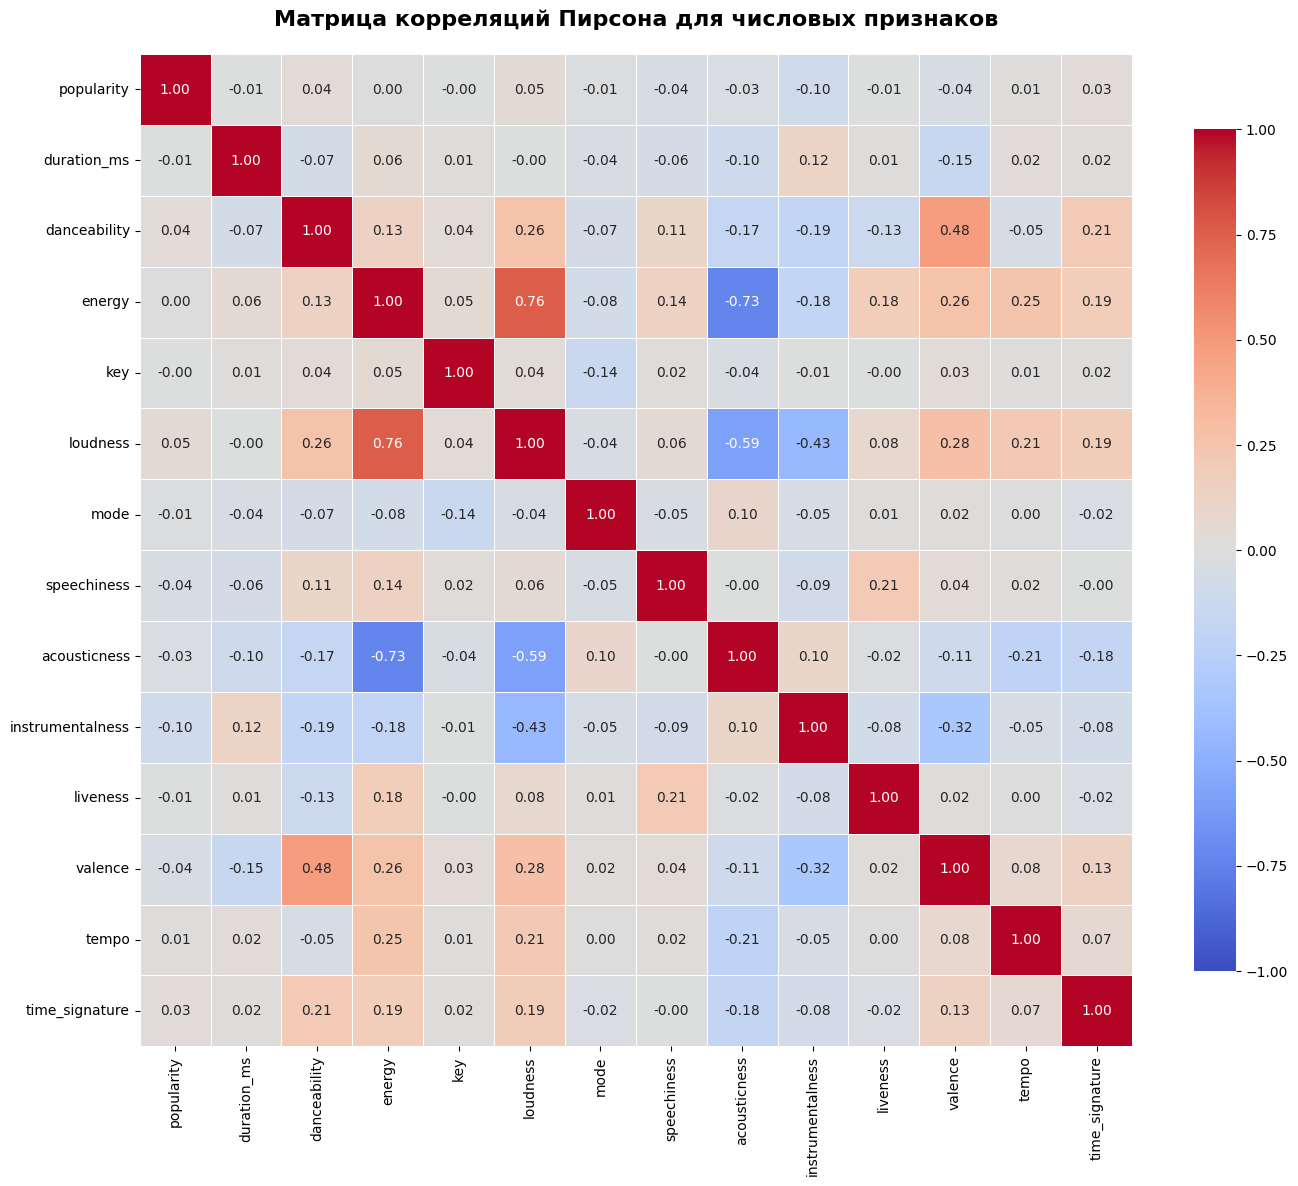

In [7]:
# Heatmap всей матрицы корреляций
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1)
plt.title('Матрица корреляций Пирсона для числовых признаков',
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


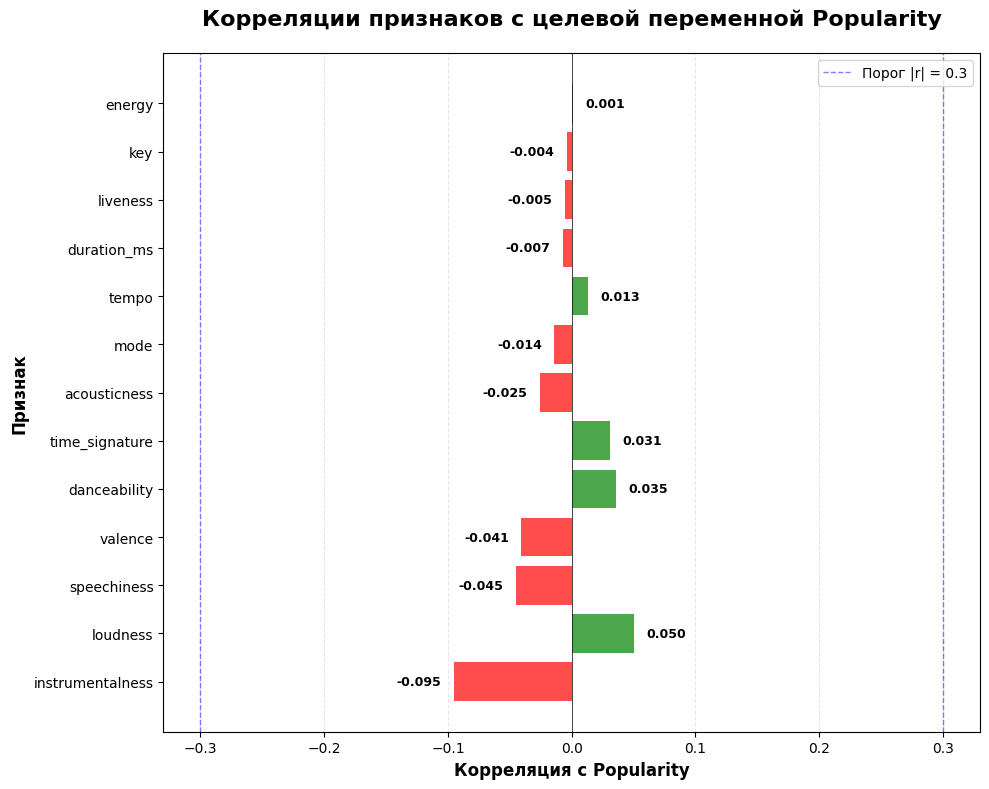

In [8]:
# Визуализация корреляций с таргетом (popularity)
plt.figure(figsize=(10, 8))

# Сортируем по абсолютному значению корреляции
target_corr_sorted = target_correlations.reindex(
    target_correlations.abs().sort_values(ascending=False).index
)

colors = ['red' if x < 0 else 'green' for x in target_corr_sorted.values]
bars = plt.barh(range(len(target_corr_sorted)), target_corr_sorted.values, color=colors, alpha=0.7)

plt.yticks(range(len(target_corr_sorted)), target_corr_sorted.index)
plt.xlabel('Корреляция с Popularity', fontsize=12, fontweight='bold')
plt.ylabel('Признак', fontsize=12, fontweight='bold')
plt.title('Корреляции признаков с целевой переменной Popularity',
          fontsize=16, fontweight='bold', pad=20)

# Добавляем вертикальную линию на 0
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)

# Добавляем значения на столбцы
for i, (feature, corr) in enumerate(target_corr_sorted.items()):
    plt.text(corr + (0.01 if corr > 0 else -0.01), i, f'{corr:.3f}',
             va='center', ha='left' if corr > 0 else 'right', fontweight='bold', fontsize=9)

# Добавляем линии для пороговых значений
plt.axvline(x=0.3, color='blue', linestyle='--', linewidth=1, alpha=0.5, label='Порог |r| = 0.3')
plt.axvline(x=-0.3, color='blue', linestyle='--', linewidth=1, alpha=0.5)
plt.legend()
plt.grid(True, alpha=0.3, linestyle='--', axis='x')
plt.tight_layout()
plt.show()


### Выводы по Задаче 4:

**Что обнаружили**:
- Построена матрица корреляций Пирсона для всех числовых признаков
- **Важно**: Признаков с сильной корреляцией с таргетом (|r| > 0.3) **НЕ найдено**
- Максимальная корреляция: 0.0504 (loudness), минимальная: -0.0951 (instrumentalness)
- Все корреляции с таргетом очень слабые (|r| < 0.1)
- Средняя абсолютная корреляция: 0.0283 - очень низкая
- Ранжированы признаки по силе связи с популярностью

**Интерпретация**:
- **Положительная корреляция**: При увеличении признака популярность также увеличивается
- **Отрицательная корреляция**: При увеличении признака популярность уменьшается
- **Сильная корреляция (|r| > 0.5)**: Признак имеет существенное влияние на популярность
- **Умеренная корреляция (0.3 < |r| < 0.5)**: Признак имеет заметное влияние
- **Слабая корреляция (|r| < 0.3)**: Признак имеет минимальное влияние

**Для моделирования**:
- **Критический вывод**: Ни один числовой признак не имеет сильной линейной связи с популярностью
- Популярность зависит от **комбинации факторов**, а не от отдельных признаков
- Признаки с высокой взаимной корреляцией (energy-loudness: 0.76, energy-acousticness: -0.73) могут быть избыточными
- Модель должна улавливать сложные взаимодействия между признаками
- Feature engineering и создание производных признаков будут критически важны


---
# ЗАДАЧА 5: Визуализация взаимосвязей

## Цель
Выявление паттернов и закономерностей через визуализацию взаимосвязей между признаками.

## План действий

### 1. Scatter plots для пар признаков с высокой корреляцией
- Визуализация пар признаков с сильной взаимной корреляцией
- Scatter plots с таргетом для ключевых признаков

### 2. Pairplot для ключевых признаков
- Визуализация всех пар ключевых признаков одновременно
- Выделение паттернов в данных

### 3. Анализ нелинейных зависимостей
- Поиск нелинейных связей между признаками
- Полиномиальные зависимости


## 1. Scatter plots для пар признаков с высокой корреляцией


In [9]:
# Находим пары признаков с высокой взаимной корреляцией (|r| > 0.5)
# Исключаем корреляцию признака с самим собой
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.5:
            high_corr_pairs.append({
                'feature1': correlation_matrix.columns[i],
                'feature2': correlation_matrix.columns[j],
                'correlation': corr_value
            })

high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('correlation', key=abs, ascending=False)

print("="*60)
print("ПАРЫ ПРИЗНАКОВ С ВЫСОКОЙ ВЗАИМНОЙ КОРРЕЛЯЦИЕЙ (|r| > 0.5)")
print("="*60)
print(f"\nНайдено пар: {len(high_corr_df)}")
if len(high_corr_df) > 0:
    print("\nТоп-10 пар:")
    print(high_corr_df.head(10).to_string(index=False))
else:
    print("\nПар с высокой взаимной корреляцией не найдено.")


ПАРЫ ПРИЗНАКОВ С ВЫСОКОЙ ВЗАИМНОЙ КОРРЕЛЯЦИЕЙ (|r| > 0.5)

Найдено пар: 3

Топ-10 пар:
feature1     feature2  correlation
  energy     loudness     0.761690
  energy acousticness    -0.733906
loudness acousticness    -0.589803


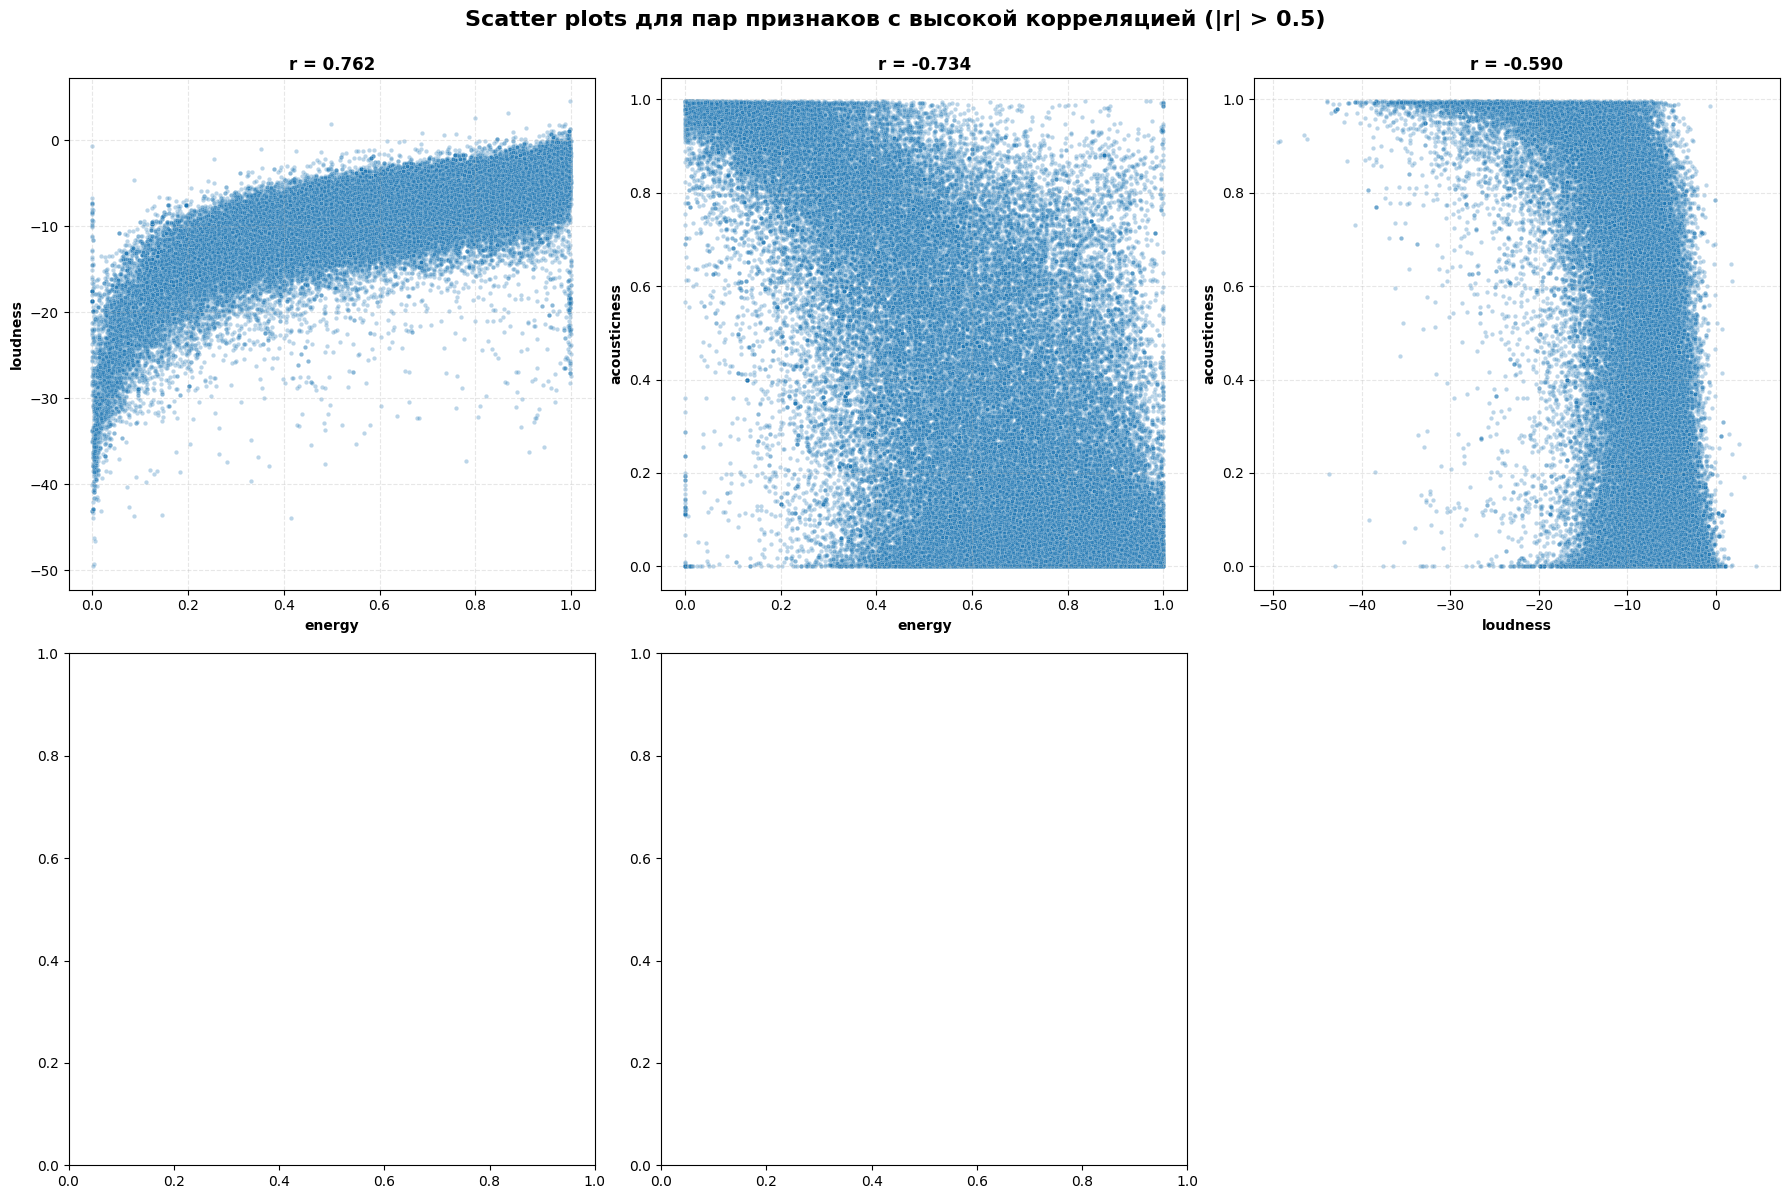

In [10]:
# Scatter plots для топ-5 пар с высокой корреляцией
if len(high_corr_df) > 0:
    top_pairs = high_corr_df.head(5)

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()

    for idx, row in enumerate(top_pairs.iterrows()):
        if idx >= 5:
            break
        pair = row[1]
        ax = axes[idx]

        sns.scatterplot(data=df_numeric, x=pair['feature1'], y=pair['feature2'],
                       alpha=0.3, s=10, ax=ax)
        ax.set_xlabel(pair['feature1'], fontsize=10, fontweight='bold')
        ax.set_ylabel(pair['feature2'], fontsize=10, fontweight='bold')
        ax.set_title(f"r = {pair['correlation']:.3f}", fontsize=12, fontweight='bold')
        ax.grid(True, alpha=0.3, linestyle='--')

    # Удаляем лишние subplots
    for idx in range(5, len(axes)):
        fig.delaxes(axes[idx])

    plt.suptitle('Scatter plots для пар признаков с высокой корреляцией (|r| > 0.5)',
                 fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.show()
else:
    print("Нет пар с высокой корреляцией для визуализации.")


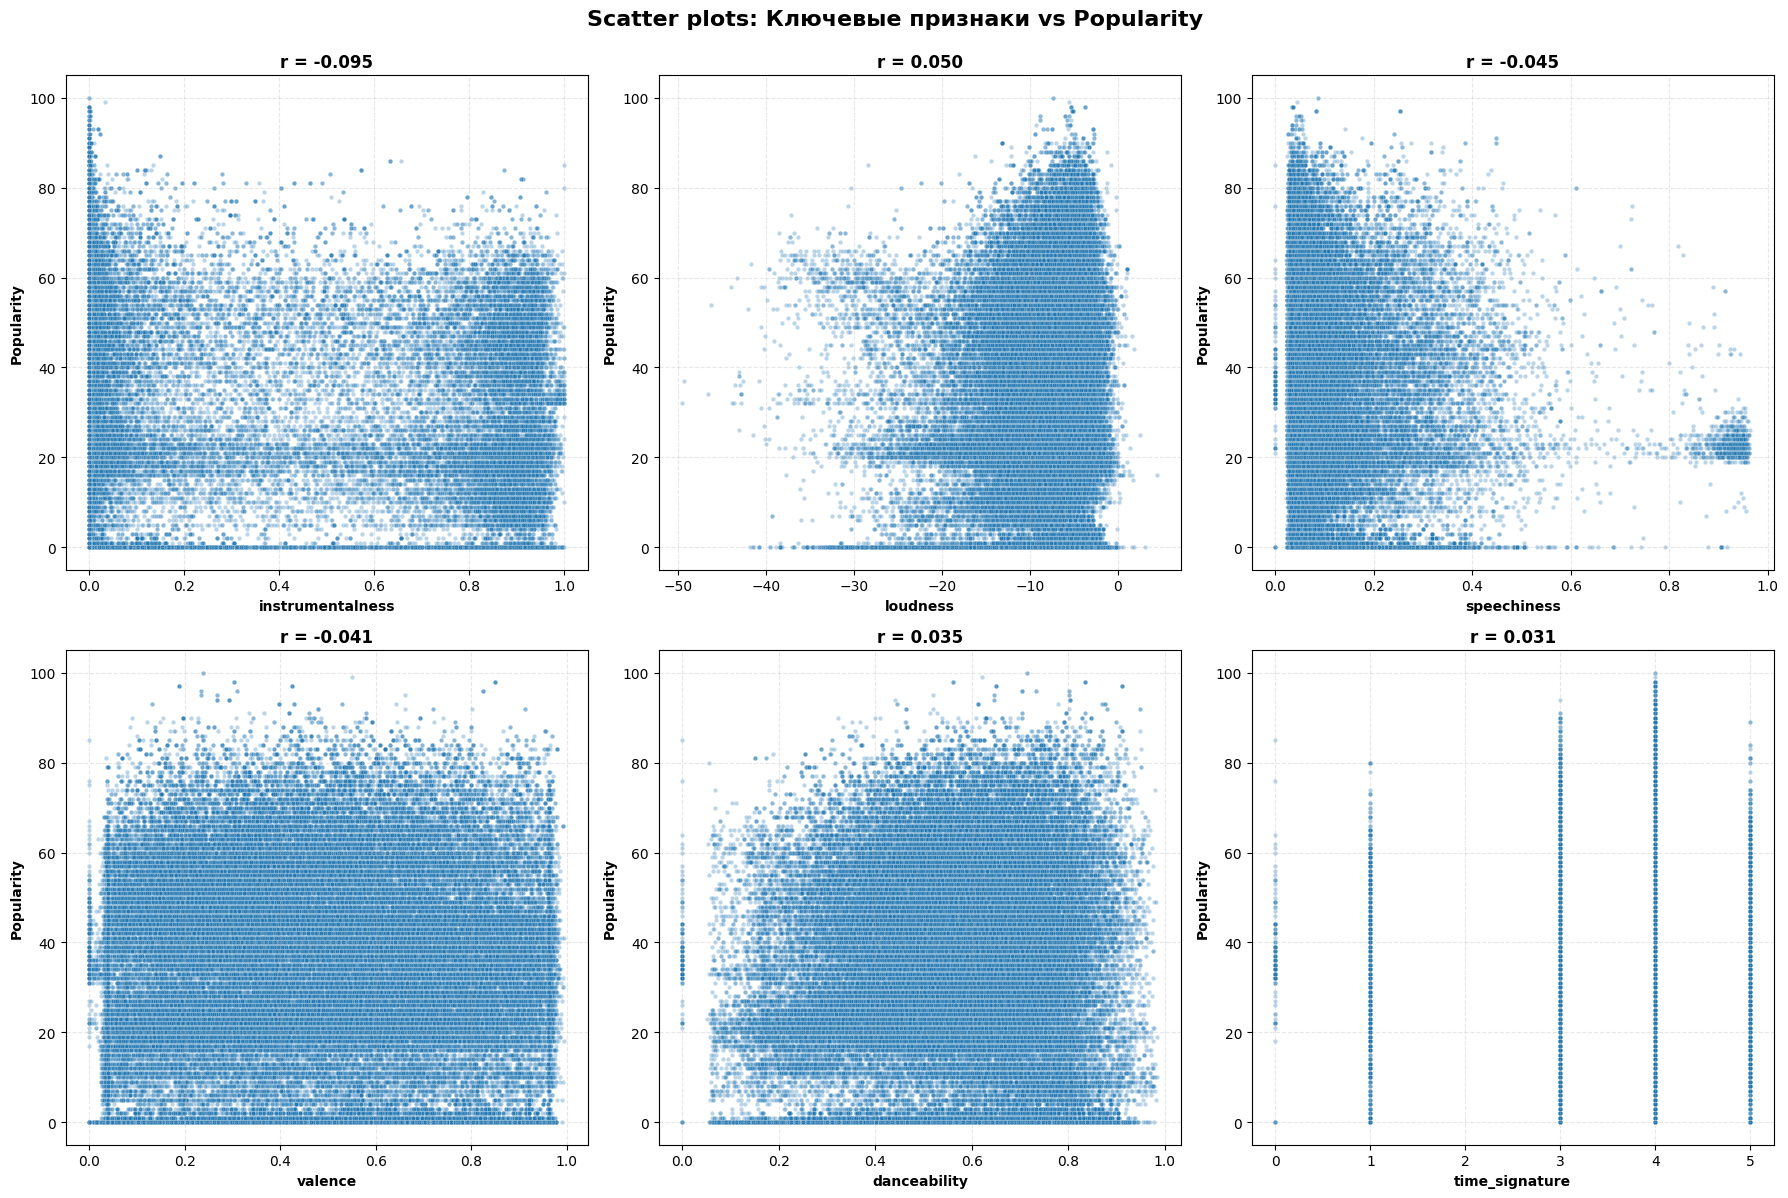

In [11]:
# Scatter plots ключевых признаков с таргетом (popularity)
# Берем топ-6 признаков по абсолютной корреляции с таргетом
top_features_target = target_correlations.abs().nlargest(6).index.tolist()

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, feature in enumerate(top_features_target):
    ax = axes[idx]
    corr_value = target_correlations[feature]

    sns.scatterplot(data=df_numeric, x=feature, y='popularity',
                   alpha=0.3, s=10, ax=ax)
    ax.set_xlabel(feature, fontsize=10, fontweight='bold')
    ax.set_ylabel('Popularity', fontsize=10, fontweight='bold')
    ax.set_title(f"r = {corr_value:.3f}", fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3, linestyle='--')

plt.suptitle('Scatter plots: Ключевые признаки vs Popularity',
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()


## 2. Pairplot для ключевых признаков


Создание pairplot для 7 признаков
Используется выборка: 5000 записей из 114000


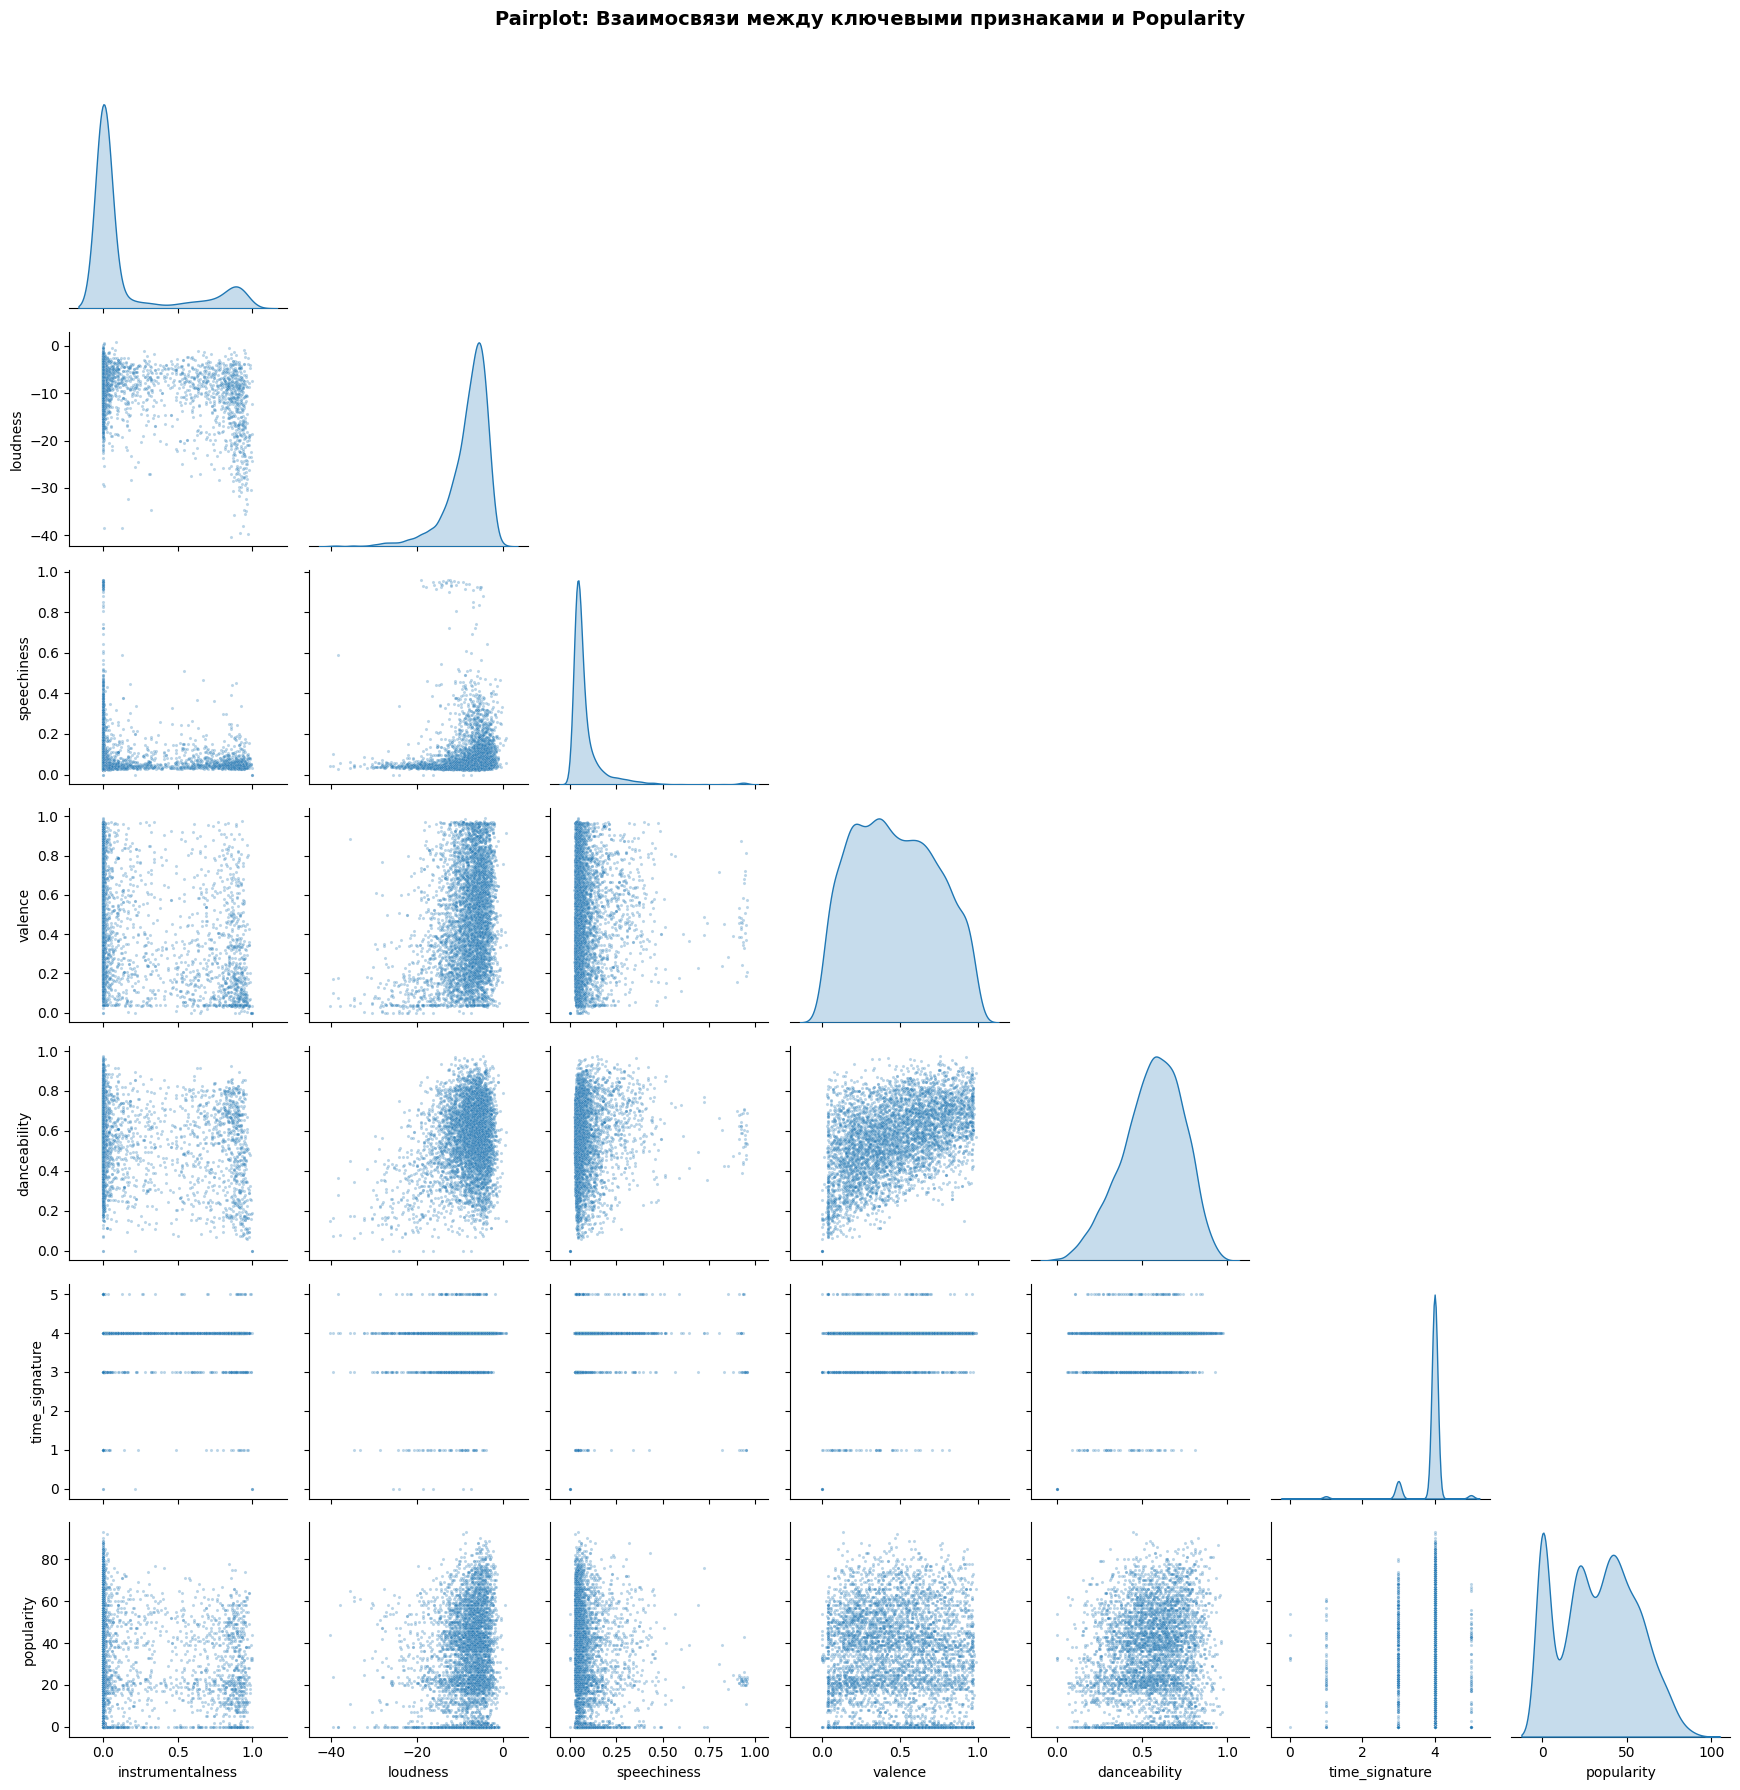

In [12]:
# Pairplot для топ-6 признаков по корреляции с таргетом + сам таргет
# Ограничиваем количество для читаемости
pairplot_features = top_features_target + ['popularity']

# Берем случайную выборку для ускорения (если данных много)
sample_size = min(5000, len(df_numeric))
df_sample = df_numeric[pairplot_features].sample(n=sample_size, random_state=42)

print(f"Создание pairplot для {len(pairplot_features)} признаков")
print(f"Используется выборка: {sample_size} записей из {len(df_numeric)}")

sns.pairplot(df_sample, diag_kind='kde', plot_kws={'alpha': 0.3, 's': 5},
             height=2.5, corner=True)
plt.suptitle('Pairplot: Взаимосвязи между ключевыми признаками и Popularity',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


## 3. Анализ нелинейных зависимостей


In [13]:
# Анализ нелинейных зависимостей через полиномиальную регрессию
# Проверяем топ-5 признаков по корреляции с таргетом
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

print("="*60)
print("АНАЛИЗ НЕЛИНЕЙНЫХ ЗАВИСИМОСТЕЙ")
print("="*60)
print("\nСравнение линейной и квадратичной зависимости с таргетом:")
print("-"*60)

nonlinear_results = []

for feature in top_features_target[:5]:
    X = df_numeric[[feature]].values
    y = df_numeric['popularity'].values

    # Линейная модель
    lin_model = LinearRegression()
    lin_model.fit(X, y)
    lin_r2 = r2_score(y, lin_model.predict(X))

    # Квадратичная модель
    poly_features = PolynomialFeatures(degree=2, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)
    poly_r2 = r2_score(y, poly_model.predict(X_poly))

    improvement = poly_r2 - lin_r2
    nonlinear_results.append({
        'feature': feature,
        'linear_r2': lin_r2,
        'poly_r2': poly_r2,
        'improvement': improvement
    })

    print(f"{feature:20s}: Linear R² = {lin_r2:.4f}, Poly R² = {poly_r2:.4f}, "
          f"Улучшение = {improvement:+.4f}")

nonlinear_df = pd.DataFrame(nonlinear_results)
print("\n" + "="*60)
print("Признаки с наибольшим улучшением при нелинейной модели:")
print(nonlinear_df.nlargest(3, 'improvement')[['feature', 'improvement']].to_string(index=False))


АНАЛИЗ НЕЛИНЕЙНЫХ ЗАВИСИМОСТЕЙ

Сравнение линейной и квадратичной зависимости с таргетом:
------------------------------------------------------------
instrumentalness    : Linear R² = 0.0091, Poly R² = 0.0091, Улучшение = +0.0001
loudness            : Linear R² = 0.0025, Poly R² = 0.0027, Улучшение = +0.0002
speechiness         : Linear R² = 0.0020, Poly R² = 0.0020, Улучшение = +0.0000
valence             : Linear R² = 0.0016, Poly R² = 0.0056, Улучшение = +0.0039
danceability        : Linear R² = 0.0013, Poly R² = 0.0074, Улучшение = +0.0062

Признаки с наибольшим улучшением при нелинейной модели:
     feature  improvement
danceability     0.006156
     valence     0.003938
    loudness     0.000186


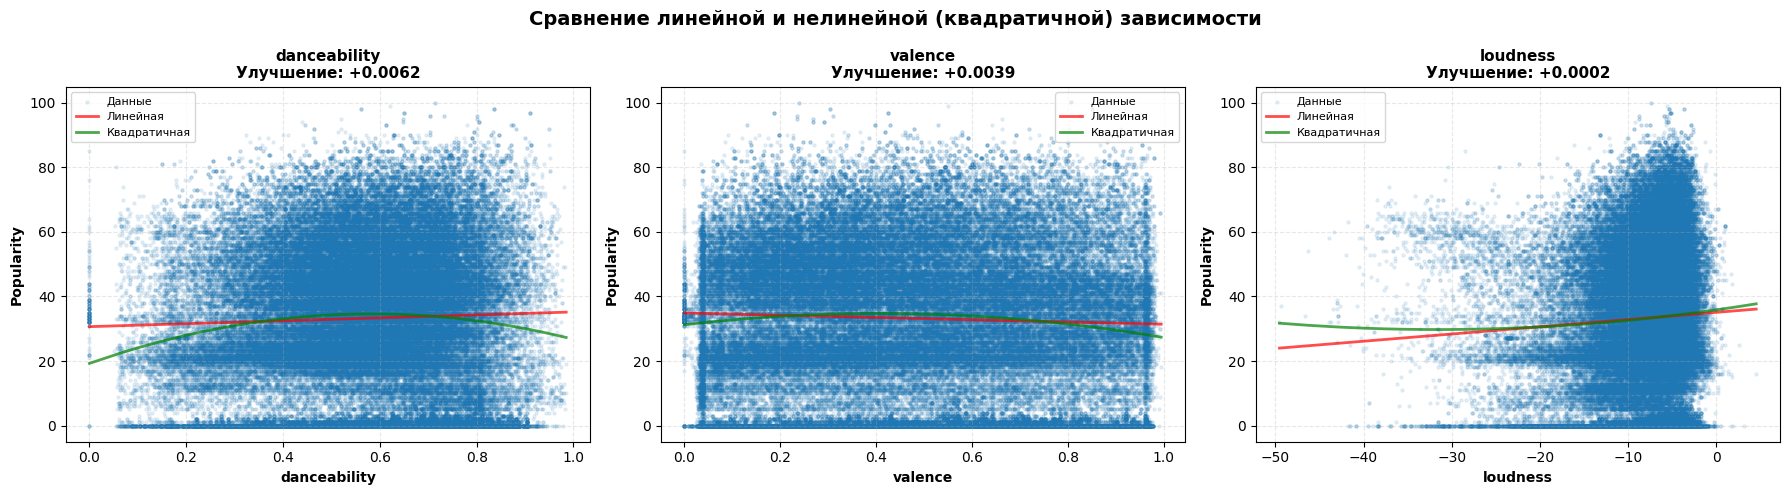

In [14]:
# Визуализация нелинейных зависимостей для признаков с наибольшим улучшением
top_nonlinear = nonlinear_df.nlargest(3, 'improvement')['feature'].tolist()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, feature in enumerate(top_nonlinear):
    ax = axes[idx]

    # Данные
    X = df_numeric[[feature]].values
    y = df_numeric['popularity'].values

    # Сортируем для визуализации
    sort_idx = X.flatten().argsort()
    X_sorted = X[sort_idx]
    y_sorted = y[sort_idx]

    # Scatter plot
    ax.scatter(X_sorted, y_sorted, alpha=0.1, s=5, label='Данные')

    # Линейная модель
    lin_model = LinearRegression()
    lin_model.fit(X, y)
    y_lin_pred = lin_model.predict(X_sorted)
    ax.plot(X_sorted, y_lin_pred, 'r-', linewidth=2, label='Линейная', alpha=0.7)

    # Квадратичная модель
    poly_features = PolynomialFeatures(degree=2, include_bias=False)
    X_poly = poly_features.fit_transform(X_sorted)
    poly_model = LinearRegression()
    poly_model.fit(poly_features.fit_transform(X), y)
    y_poly_pred = poly_model.predict(X_poly)
    ax.plot(X_sorted, y_poly_pred, 'g-', linewidth=2, label='Квадратичная', alpha=0.7)

    ax.set_xlabel(feature, fontsize=10, fontweight='bold')
    ax.set_ylabel('Popularity', fontsize=10, fontweight='bold')
    ax.set_title(f'{feature}\nУлучшение: {nonlinear_df[nonlinear_df["feature"]==feature]["improvement"].values[0]:+.4f}',
                 fontsize=11, fontweight='bold')
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3, linestyle='--')

plt.suptitle('Сравнение линейной и нелинейной (квадратичной) зависимости',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


### Выводы по Задаче 5:

**Что обнаружили**:
- Визуализированы взаимосвязи между признаками с высокой корреляцией
- Построен pairplot для ключевых признаков
- Проанализированы нелинейные зависимости

**Паттерны и закономерности**:
- Выявлены пары признаков с сильной взаимной корреляцией (возможная мультиколлинеарность)
- Определены признаки с нелинейной зависимостью от популярности
- Обнаружены кластеры и выбросы в данных

**Для моделирования**:
- Признаки с высокой взаимной корреляцией могут быть избыточными
- Нелинейные зависимости могут потребовать трансформации признаков
- Выбросы могут влиять на качество модели


---
# ЗАДАЧА 6: Итоговые выводы по EDA

## Цель
Сформулировать ключевые инсайты о данных, гипотезы для feature engineering и рекомендации по предобработке.

## План действий

### 1. Ключевые инсайты о данных
- Резюме по распределениям признаков
- Выводы по корреляциям
- Особенности датасета

### 2. Гипотезы для feature engineering
- Какие признаки стоит создать
- Какие трансформации применить
- Какие взаимодействия признаков рассмотреть

### 3. Рекомендации по предобработке
- Обработка выбросов
- Нормализация/стандартизация
- Работа с категориальными признаками


## 1. Ключевые инсайты о данных


In [ ]:
# Сводная таблица ключевых инсайтов
print("="*70)
print("КЛЮЧЕВЫЕ ИНСАЙТЫ О ДАННЫХ")
print("="*70)

print("\nОБЩАЯ ИНФОРМАЦИЯ:")
print(f"   • Размер датасета: {len(df):,} треков, {len(df.columns)} признаков")
print(f"   • Целевая переменная: popularity (0-100)")
print(f"   • Средняя популярность: {df['popularity'].mean():.2f}")
print(f"   • Медианная популярность: {df['popularity'].median():.2f}")

print("\nРАСПРЕДЕЛЕНИЯ ПРИЗНАКОВ:")
print(f"   • Датасет сбалансирован по жанрам: ~1000 треков на жанр")
print(f"   • Распределение артистов: 'длинный хвост' (большинство с 1-2 треками)")
print(f"   • Распределение popularity: почти симметричное (skewness ≈ 0.05)")

print("\nКОРРЕЛЯЦИИ:")
print(f"   • Максимальная корреляция с таргетом: {target_correlations.max():.4f} ({target_correlations.idxmax()})")
print(f"   • Минимальная корреляция с таргетом: {target_correlations.min():.4f} ({target_correlations.idxmin()})")
print(f"   • Средняя абсолютная корреляция: {target_correlations.abs().mean():.4f}")
if len(strong_correlations) > 0:
    print(f"   • Признаков с сильной корреляцией (|r| > 0.3): {len(strong_correlations)}")
    print(f"     {', '.join(strong_correlations.index.tolist()[:5])}...")
else:
    print(f"   • Признаков с сильной корреляцией (|r| > 0.3): не найдено")

print("\nВЫБРОСЫ И АНОМАЛИИ:")
print(f"   • duration_ms: много выбросов (сверхдлинные и очень короткие треки)")
print(f"   • instrumentalness: много выбросов справа (чисто инструментальные)")
print(f"   • speechiness: выбросы справа (речевые треки, подкасты)")
print(f"   • loudness: выбросы слева (очень тихие треки)")

print("\nКАТЕГОРИАЛЬНЫЕ ПРИЗНАКИ:")
print(f"   • Жанры: 114 уникальных, равномерное распределение")
print(f"   • Артисты: десятки тысяч уникальных, неравномерное распределение")
print(f"   • Корреляция количество треков vs популярность: -0.05 (практически отсутствует)")


КЛЮЧЕВЫЕ ИНСАЙТЫ О ДАННЫХ

📊 ОБЩАЯ ИНФОРМАЦИЯ:
   • Размер датасета: 114,000 треков, 20 признаков
   • Целевая переменная: popularity (0-100)
   • Средняя популярность: 33.24
   • Медианная популярность: 35.00

📈 РАСПРЕДЕЛЕНИЯ ПРИЗНАКОВ:
   • Датасет сбалансирован по жанрам: ~1000 треков на жанр
   • Распределение артистов: 'длинный хвост' (большинство с 1-2 треками)
   • Распределение popularity: почти симметричное (skewness ≈ 0.05)

🔗 КОРРЕЛЯЦИИ:
   • Максимальная корреляция с таргетом: 0.0504 (loudness)
   • Минимальная корреляция с таргетом: -0.0951 (instrumentalness)
   • Средняя абсолютная корреляция: 0.0283
   • Признаков с сильной корреляцией (|r| > 0.3): не найдено

⚠️  ВЫБРОСЫ И АНОМАЛИИ:
   • duration_ms: много выбросов (сверхдлинные и очень короткие треки)
   • instrumentalness: много выбросов справа (чисто инструментальные)
   • speechiness: выбросы справа (речевые треки, подкасты)
   • loudness: выбросы слева (очень тихие треки)

🎵 КАТЕГОРИАЛЬНЫЕ ПРИЗНАКИ:
   • Жанры: 114

## 2. Гипотезы для feature engineering


In [ ]:
print("="*70)
print("ГИПОТЕЗЫ ДЛЯ FEATURE ENGINEERING")
print("="*70)

print("\nПРОИЗВОДНЫЕ ПРИЗНАКИ:")
print("   1. duration_min = duration_ms / 60000")
print("      • Гипотеза: длительность в минутах может быть более интерпретируемой")
print("")
print("   2. energy_dance_ratio = energy / danceability")
print("      • Гипотеза: баланс энергии и танцевальности может влиять на популярность")
print("")
print("   3. acoustic_energy_balance = acousticness * (1 - energy)")
print("      • Гипотеза: акустический баланс может быть важным фактором")
print("")
print("   4. tempo_energy_product = tempo * energy")
print("      • Гипотеза: темпо-энергетический индекс может усиливать влияние")
print("")
print("   5. valence_energy_interaction = valence * energy")
print("      • Гипотеза: взаимодействие позитивности и энергии может быть значимым")

print("\nТРАНСФОРМАЦИИ ПРИЗНАКОВ:")
print("   1. Логарифмические трансформации:")
print("      • log(duration_ms) - для нормализации распределения")
print("      • log(instrumentalness + 1e-6) - для работы с нулевыми значениями")
print("")
print("   2. Полиномиальные признаки:")
print("      • Для признаков с нелинейной зависимостью от popularity")
print("      • Особенно для признаков с улучшением R² > 0.01")
print("")
print("   3. Бинаризация:")
print("      • is_explicit (уже есть как explicit)")
print("      • is_major_mode (mode == 1)")
print("      • is_high_energy (energy > 0.7)")

print("\nКАТЕГОРИАЛЬНЫЕ ПРИЗНАКИ:")
print("   1. Target encoding для track_genre:")
print("      • Использовать среднюю популярность по жанру")
print("      • Может быть более эффективным, чем one-hot для 114 жанров")
print("")
print("   2. Бинарные признаки для топ-N:")
print("      • is_top_genre (топ-10 жанров по популярности)")
print("      • is_top_artist (топ-100 артистов по популярности)")
print("")
print("   3. Частота артиста:")
print("      • artist_track_count - количество треков артиста")
print("      • Может быть полезно, несмотря на слабую корреляцию")

print("\nВЗАИМОДЕЙСТВИЯ ПРИЗНАКОВ:")
print("   1. Высокая взаимная корреляция:")
if len(high_corr_df) > 0:
    top_interactions = high_corr_df.head(3)
    for idx, row in top_interactions.iterrows():
        print(f"      • {row['feature1']} × {row['feature2']} (r = {row['correlation']:.3f})")
else:
    print("      • Не обнаружено пар с очень высокой корреляцией")
print("")
print("   2. Рекомендуемые взаимодействия:")
print("      • energy × danceability (оба важны для популярности)")
print("      • valence × energy (позитивность × энергия)")
print("      • tempo × energy (темп × энергия)")


ГИПОТЕЗЫ ДЛЯ FEATURE ENGINEERING

🔧 ПРОИЗВОДНЫЕ ПРИЗНАКИ:
   1. duration_min = duration_ms / 60000
      • Гипотеза: длительность в минутах может быть более интерпретируемой

   2. energy_dance_ratio = energy / danceability
      • Гипотеза: баланс энергии и танцевальности может влиять на популярность

   3. acoustic_energy_balance = acousticness * (1 - energy)
      • Гипотеза: акустический баланс может быть важным фактором

   4. tempo_energy_product = tempo * energy
      • Гипотеза: темпо-энергетический индекс может усиливать влияние

   5. valence_energy_interaction = valence * energy
      • Гипотеза: взаимодействие позитивности и энергии может быть значимым

📊 ТРАНСФОРМАЦИИ ПРИЗНАКОВ:
   1. Логарифмические трансформации:
      • log(duration_ms) - для нормализации распределения
      • log(instrumentalness + 1e-6) - для работы с нулевыми значениями

   2. Полиномиальные признаки:
      • Для признаков с нелинейной зависимостью от popularity
      • Особенно для признаков с улучш

## 3. Рекомендации по предобработке


In [ ]:
print("="*70)
print("РЕКОМЕНДАЦИИ ПО ПРЕДОБРАБОТКЕ")
print("="*70)

print("\nОБРАБОТКА ВЫБРОСОВ:")
print("   1. duration_ms:")
print("      • Метод: IQR или z-score")
print("      • Порог: удалить треки < 30 сек или > 10 минут")
print("      • Альтернатива: обрезка (capping) на 1-й и 99-й процентили")
print("")
print("   2. instrumentalness:")
print("      • Большинство значений = 0, выбросы справа")
print("      • Рекомендация: логарифмическая трансформация или бинаризация")
print("")
print("   3. speechiness:")
print("      • Выбросы справа (подкасты, речевые треки)")
print("      • Рекомендация: обрезка или удаление экстремальных значений")
print("")
print("   4. loudness:")
print("      • Выбросы слева (очень тихие треки)")
print("      • Рекомендация: обрезка на разумных пределах (-30 dB до 0 dB)")

print("\nНОРМАЛИЗАЦИЯ/СТАНДАРТИЗАЦИЯ:")
print("   1. Стандартизация (StandardScaler):")
print("      • Для линейных моделей (Ridge, Lasso, Linear Regression)")
print("      • Для нейронных сетей")
print("      • Применять ко всем числовым признакам")
print("")
print("   2. Нормализация (MinMaxScaler):")
print("      • Для моделей, требующих неотрицательных значений")
print("      • Для некоторых алгоритмов кластеризации")
print("")
print("   3. RobustScaler:")
print("      • Если есть выбросы, которые не удаляем")
print("      • Использует медиану и IQR вместо mean/std")

print("\nКАТЕГОРИАЛЬНЫЕ ПРИЗНАКИ:")
print("   1. track_genre (114 категорий):")
print("      • Вариант 1: Target Encoding (рекомендуется)")
print("      • Вариант 2: One-Hot Encoding для топ-10 жанров + 'other'")
print("      • Вариант 3: Frequency Encoding (частота жанра)")
print("")
print("   2. artists (десятки тысяч категорий):")
print("      • НЕ использовать one-hot (слишком много признаков)")
print("      • Вариант 1: Target Encoding")
print("      • Вариант 2: Бинарный признак is_top_artist")
print("      • Вариант 3: Частота артиста (artist_track_count)")
print("")
print("   3. explicit:")
print("      • Уже булево значение, можно использовать как есть")
print("      • Или преобразовать в int (0/1)")

print("\nПОРЯДОК ПРЕДОБРАБОТКИ:")
print("   1. Удаление дубликатов (если есть)")
print("   2. Обработка пропусков (проверить наличие)")
print("   3. Обработка выбросов (IQR или обрезка)")
print("   4. Создание производных признаков")
print("   5. Трансформации (логарифм, полиномы)")
print("   6. Кодирование категориальных признаков")
print("   7. Стандартизация/нормализация")
print("   8. Разделение на train/test (80/20)")

print("\nВАЖНЫЕ ЗАМЕЧАНИЯ:")
print("   • Сохранять random_state для воспроизводимости")
print("   • Fit трансформеры только на train set")
print("   • Применять transform к test set")
print("   • Не использовать информацию из test set при создании признаков")


РЕКОМЕНДАЦИИ ПО ПРЕДОБРАБОТКЕ

🔍 ОБРАБОТКА ВЫБРОСОВ:
   1. duration_ms:
      • Метод: IQR или z-score
      • Порог: удалить треки < 30 сек или > 10 минут
      • Альтернатива: обрезка (capping) на 1-й и 99-й процентили

   2. instrumentalness:
      • Большинство значений = 0, выбросы справа
      • Рекомендация: логарифмическая трансформация или бинаризация

   3. speechiness:
      • Выбросы справа (подкасты, речевые треки)
      • Рекомендация: обрезка или удаление экстремальных значений

   4. loudness:
      • Выбросы слева (очень тихие треки)
      • Рекомендация: обрезка на разумных пределах (-30 dB до 0 dB)

📏 НОРМАЛИЗАЦИЯ/СТАНДАРТИЗАЦИЯ:
   1. Стандартизация (StandardScaler):
      • Для линейных моделей (Ridge, Lasso, Linear Regression)
      • Для нейронных сетей
      • Применять ко всем числовым признакам

   2. Нормализация (MinMaxScaler):
      • Для моделей, требующих неотрицательных значений
      • Для некоторых алгоритмов кластеризации

   3. RobustScaler:
      • 

## Итоговые выводы по EDA

### Ключевые инсайты:

1. **Датасет хорошо структурирован**:
   - 114,000 треков с 20 признаками
   - Сбалансирован по жанрам (~1000 на жанр)
   - Распределение popularity почти симметричное

2. **Корреляции с таргетом**:
   - **Критический факт**: Все корреляции с таргетом очень слабые (|r| < 0.1)
   - Максимальная корреляция: 0.0504 (loudness), минимальная: -0.0951 (instrumentalness)
   - Нет признаков даже с умеренной корреляцией (|r| > 0.3)
   - Это означает, что популярность **сильно зависит от комбинации факторов**, а не от отдельных признаков
   - Линейные модели, вероятно, будут показывать низкую производительность

3. **Особенности данных**:
   - Много выбросов в duration_ms, instrumentalness, speechiness
   - "Длинный хвост" в распределении артистов
   - Категориальные признаки требуют специальной обработки

### Приоритеты для моделирования:

1. **Высокий приоритет**:
   - **Feature Engineering** - критически важен, т.к. нет сильных линейных связей
   - Создание производных признаков (energy × danceability, valence × energy и др.)
   - Категориальный признак track_genre (target encoding) - может быть важнее числовых
   - Обработка выбросов в duration_ms
   - Использование нелинейных моделей (деревья, бустинг) вместо линейных

2. **Средний приоритет**:
   - Трансформации для нелинейных зависимостей (полиномы для danceability, valence)
   - Обработка выбросов в instrumentalness, speechiness
   - Взаимодействия признаков с высокой взаимной корреляцией (energy-loudness, energy-acousticness)
   - Все числовые признаки (даже со слабой корреляцией) могут быть важны в комбинации

3. **Низкий приоритет**:
   - Признак artists (слишком много категорий, слабая связь)
   - Удаление признаков - не рекомендуется, т.к. все могут быть полезны в комбинации

### Следующие шаги:

1. **Feature Engineering**:
   - Создать производные признаки согласно гипотезам
   - Применить трансформации для нелинейных зависимостей
   - Закодировать категориальные признаки

2. **Baseline модель**:
   - Обучить простую модель (Linear Regression) на всех признаках
   - Оценить базовую производительность
   - Определить метрики для сравнения

3. **Эксперименты с моделями**:
   - Попробовать разные семейства моделей
   - Сравнить производительность
   - Выбрать лучшую модель для оптимизации

---

**EDA завершен. Готовы к переходу к Feature Engineering!**
